**DATA SCIENCE ASSIGNMENT 1**


**SUBMITTED BY:TUSHAR MITTAL (101916042)**

In [1]:
import seaborn as sns
import cudf as pd
import cupy as cp
import cuml

In [2]:
from cuml import LinearRegression
from cuml.linear_model import LinearRegression
from cuml import Ridge
from cuml.linear_model import Ridge
from cuml.model_selection import train_test_split
from cuml.linear_model import Lasso
from cuml.ensemble import RandomForestRegressor

In [3]:
df_train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
df_train.shape

(1460, 81)

In [6]:
df_test.shape

(1459, 80)

In [7]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,<NA>,Reg,Lvl,AllPub,...,120,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,<NA>,IR1,Lvl,AllPub,...,0,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,<NA>,IR1,Lvl,AllPub,...,0,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,<NA>,IR1,Lvl,AllPub,...,0,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,<NA>,IR1,HLS,AllPub,...,144,0,<NA>,<NA>,<NA>,0,1,2010,WD,Normal


In [8]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,12,2008,WD,Normal,250000


In [10]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [12]:
df_train.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64
 5   Street         1460 non-null   object
 6   Alley          91 non-null     object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64
 18  OverallCond    1460 non-null   

In [13]:
df_test.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1459 non-null   int64
 1   MSSubClass     1459 non-null   int64
 2   MSZoning       1455 non-null   object
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64
 5   Street         1459 non-null   object
 6   Alley          107 non-null    object
 7   LotShape       1459 non-null   object
 8   LandContour    1459 non-null   object
 9   Utilities      1457 non-null   object
 10  LotConfig      1459 non-null   object
 11  LandSlope      1459 non-null   object
 12  Neighborhood   1459 non-null   object
 13  Condition1     1459 non-null   object
 14  Condition2     1459 non-null   object
 15  BldgType       1459 non-null   object
 16  HouseStyle     1459 non-null   object
 17  OverallQual    1459 non-null   int64
 18  OverallCond    1459 non-null   

In [14]:
n_train,n_test = df_train.shape[0],df_test.shape[0]
print(n_train)
print(n_test)

1460
1459


In [15]:
Y = df_train['SalePrice']
df_train.drop('SalePrice',axis=1,inplace=True)

In [16]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: uint64

In [17]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: uint64

<AxesSubplot:>

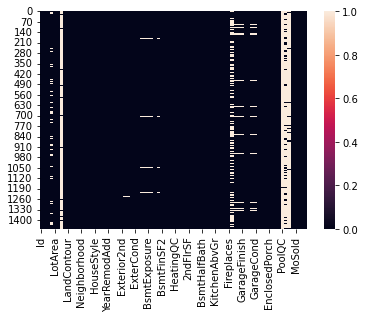

In [18]:
train1=df_train
train1=train1.to_pandas()
sns.heatmap(train1.isnull())

<AxesSubplot:>

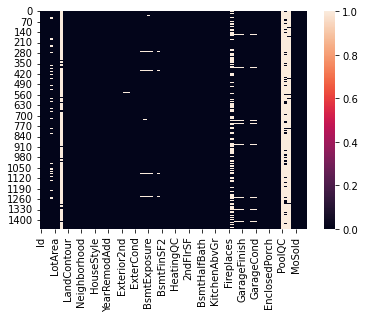

In [20]:
test1=df_test
test1=df_test.to_pandas()
sns.heatmap(test1.isnull())

In [23]:
numerical_features = df_train.dtypes[df_train.dtypes != "object"].index
print("Numerical features: ", len(numerical_features))

categorical_features = df_train.dtypes[df_train.dtypes == "object"].index
print("Categorical features: ", len(categorical_features))

Numerical features:  37
Categorical features:  43


In [24]:
for catg in list(categorical_features) :
    print(df_train[catg].value_counts())
    print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int32
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int32
##################################################
Grvl    50
Pave    41
Name: Alley, dtype: int32
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int32
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int32
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int32
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int32
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int32
############################################

In [25]:
df_train['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
144.0      1
168.0      1
160.0      1
111.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int32

In [27]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train['LotFrontage'].value_counts()

70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
144.000000      1
168.000000      1
160.000000      1
111.000000      1
46.000000       1
Name: LotFrontage, Length: 111, dtype: int32

In [28]:
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['LotFrontage'].value_counts()

68.580357     227
60.000000     133
80.000000      68
70.000000      63
50.000000      60
             ... 
49.000000       1
133.000000      1
117.000000      1
25.000000       1
135.000000      1
Name: LotFrontage, Length: 116, dtype: int32

In [29]:
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['Utilities']=df_train['Utilities'].fillna(df_train['Utilities'].mode()[0])
df_train['Exterior1st']=df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd']=df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['SaleType']=df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])
df_train['BsmtFullBath']=df_train['BsmtFullBath'].fillna(df_train['BsmtFullBath'].mode()[0])
df_train['BsmtHalfBath']=df_train['BsmtHalfBath'].fillna(df_train['BsmtHalfBath'].mode()[0])
df_train['KitchenQual']=df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])
df_train['Functional']=df_train['Functional'].fillna(df_train['Functional'].mode()[0])
df_train['GarageCars']=df_train['GarageCars'].fillna(df_train['GarageCars'].mean())
df_train['GarageArea']=df_train['GarageArea'].fillna(df_train['GarageArea'].mean())
df_train['BsmtFinSF1']=df_train['BsmtFinSF1'].fillna(df_train['BsmtFinSF1'].mean())
df_train['BsmtFinSF2']=df_train['BsmtFinSF2'].fillna(df_train['BsmtFinSF2'].mean())
df_train['BsmtUnfSF']=df_train['BsmtUnfSF'].fillna(df_train['BsmtUnfSF'].mean())
df_train['TotalBsmtSF']=df_train['TotalBsmtSF'].fillna(df_train['TotalBsmtSF'].mean())

In [30]:
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['MSZoning']=df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Utilities']=df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['Exterior1st']=df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd']=df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['SaleType']=df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
df_test['BsmtFullBath']=df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0])
df_test['BsmtHalfBath']=df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0])
df_test['KitchenQual']=df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['Functional']=df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['GarageCars']=df_test['GarageCars'].fillna(df_test['GarageCars'].mean())
df_test['GarageArea']=df_test['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())

In [31]:
df_train.drop(['Alley','PoolQC','Fence','MiscFeature','GarageYrBlt','Id'],axis=1,inplace=True)
df_test.drop(['Alley','PoolQC','Fence','MiscFeature','GarageYrBlt','Id'],axis=1,inplace=True)

In [33]:
print(df_train.shape)
print(df_test.shape)

(1460, 74)
(1459, 74)


<AxesSubplot:>

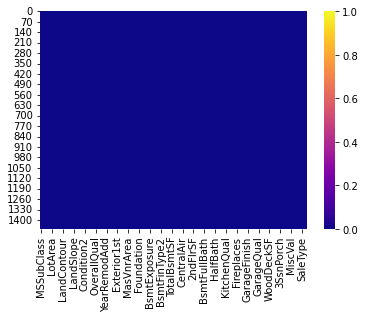

In [34]:
train1=df_train
train1=train1.to_pandas()
sns.heatmap(train1.isnull(),cmap='plasma')

<AxesSubplot:>

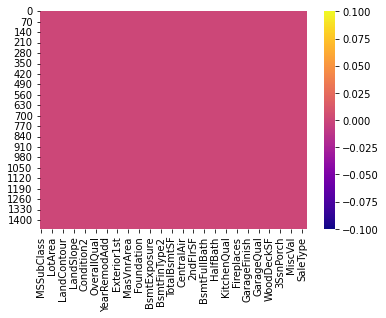

In [35]:
test1=df_test
test1=test1.to_pandas()
sns.heatmap(test1.isnull(),cmap='plasma')

In [36]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: uint64

In [37]:
train1.columns[train1.isnull().any()].tolist()

['Electrical']

In [39]:
df_train=df_train.fillna(method ='pad')

In [41]:
print(df_train.isnull().any().any())
print(df_test.isnull().any().any())

False
False


In [46]:
df_final=pd.concat([df_train,df_test],axis=0)
print(df_final.shape)

(2919, 74)


In [47]:
print(df_final.head())

   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... OpenPorchSF  EnclosedPorch  3SsnPorch  \
0    AllPub    Inside       Gtl  ...          61              0          0   
1    AllPub       FR2       Gtl  ...           0              0          0   
2    AllPub    Inside       Gtl  ...          42              0          0   
3    AllPub    Corner       Gtl  ...          35            272          0   
4    AllPub       FR2       Gtl  ...          84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition 

In [49]:
df_final=pd.get_dummies(df_final)
print(df_final.shape)

(2919, 274)


In [50]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [53]:
df_train = df_final.iloc[:n_train,:]
df_test = df_final.iloc[n_test+1:,:]
print(df_train.shape)

(1460, 274)


In [54]:
print(df_test.shape)

(1459, 274)


In [56]:
X=df_train
X.shape

(1460, 274)

In [57]:
Y.shape

(1460,)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.29,random_state=42)
print(X.isnull().any().any())
print(Y.isnull().any().any())

False
False


In [59]:
print(X_train.isnull().any().any())
print(X_test.isnull().any().any())
print(y_train.isnull().any().any())
print(y_test.isnull().any().any())

False
False
False
False


In [60]:
linreg = LinearRegression(fit_intercept = True, normalize = False, algorithm = 'svd-jacobi')
split=linreg.fit(X,Y)

In [61]:
print("R-Squared Value for Training Set: {:.3f}".format(linreg.score(X_train.astype('float32'), y_train.astype('float32'))))

R-Squared Value for Training Set: 0.933


In [63]:
print(df_test.shape)

(1459, 274)


In [64]:
y_pred_split=linreg.predict(df_test)
print(y_pred_split)

0       113087.646224
1       161459.216594
2       189553.472138
3       196558.841544
4       202156.415000
            ...      
1454     79342.971479
1455     79910.863340
1456    180904.683756
1457    104742.530224
1458    220618.736885
Length: 1459, dtype: float64


In [65]:
y_pred_split.shape

(1459,)

In [66]:
algorithm = ['svd', 'eig', 'svd-qr', 'svd-jacobi']

for i in algorithm:
    print("Algorithm:")
    print(i)
    lr = LinearRegression(fit_intercept = True, normalize = False, algorithm = i)
    reg = lr.fit(X_train,y_train)
    preds = lr.predict(X_test)
    print("MSE:")
    print(cuml.metrics.regression.mean_squared_error(y_test.astype('int64'),preds.astype('int64')))
    print("R2 Score:")
    print(cuml.metrics.regression.r2_score(y_test.astype('float32'),preds.astype('float32')))
    print("MAE:")
    print(cuml.metrics.regression.mean_absolute_error(y_test.astype('int64'),preds.astype('int64')))

Algorithm:
svd
MSE:
918930744.3309692
R2 Score:
0.8388848304748535
MAE:
19170.189125295507
Algorithm:
eig
MSE:
4870708400.37825
R2 Score:
0.14602231979370117
MAE:
26288.671394799054
Algorithm:
svd-qr
MSE:
889070439.1158392
R2 Score:
0.8441201448440552
MAE:
18962.93144208038
Algorithm:
svd-jacobi
MSE:
918930744.3309692
R2 Score:
0.8388848304748535
MAE:
19170.189125295507


In [67]:
sample_sub = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [68]:
sample_sub['SalePrice']

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64

In [69]:
sample_sub['SalePrice'] = y_pred_split

sample_sub.to_csv('submission1.csv', index=False)

In [70]:
sample_sub['SalePrice']

0       113087.646224
1       161459.216594
2       189553.472138
3       196558.841544
4       202156.415000
            ...      
1454     79342.971479
1455     79910.863340
1456    180904.683756
1457    104742.530224
1458    220618.736885
Name: SalePrice, Length: 1459, dtype: float64

RIDGE REGRESSION:

In [73]:
alpha = cp.array([1e-5])
ridge1 = Ridge(alpha = alpha, fit_intercept = True, normalize = False,
solver = "eig")
model1=ridge1.fit(X,Y)
y_pred_ridge1=model1.predict(df_test)
print(y_pred_ridge1)

0       113087.416290
1       161458.446225
2       189553.122631
3       196558.604829
4       202156.638433
            ...      
1454     79342.772011
1455     79910.869151
1456    180904.142877
1457    104742.302047
1458    220618.672612
Length: 1459, dtype: float64


In [74]:
alpha = cp.array([1e-5])
ridge2 = Ridge(alpha = alpha, fit_intercept = True, normalize = False,
solver = "svd")
model2=ridge2.fit(X,Y)
y_pred_ridge2=model2.predict(df_test)
print(y_pred_ridge2)

0       113087.410953
1       161458.483155
2       189553.130452
3       196558.608772
4       202156.626301
            ...      
1454     79342.783172
1455     79910.863349
1456    180904.114714
1457    104742.295962
1458    220618.681300
Length: 1459, dtype: float64


In [75]:
sample_sub['SalePrice'] = y_pred_ridge1

sample_sub.to_csv('submission2.csv', index=False)

In [76]:
sample_sub['SalePrice'] = y_pred_ridge2

sample_sub.to_csv('submission3.csv', index=False)

LASSO REGRESSION:

In [78]:
ls = Lasso(alpha = 0.1)
result_lasso = ls.fit(X, Y)
y_pred_lasso=result_lasso.predict(df_test)
y_pred_lasso

0       113206.901912
1       163556.290672
2       189922.796277
3       196015.283923
4       202142.856499
            ...      
1454     78769.671819
1455     77124.488153
1456    181137.695798
1457    104965.781670
1458    219685.238413
Length: 1459, dtype: float64

In [79]:
sample_sub['SalePrice'] = y_pred_lasso

sample_sub.to_csv('submission4.csv', index=False)